In [77]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [78]:
df=pd.read_csv('C:\\Users\\admin\\Desktop\\MACHINE_LEARNING_CODES\\ML_PROJECT\\notebook\\data\\StudentsPerformance1.csv')

In [79]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,Average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [80]:
df.shape

(1000, 10)

In [81]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
total_score                    0
Average_score                  0
dtype: int64

In [82]:
df.duplicated().sum()

np.int64(0)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race_ethnicity               1000 non-null   object 
 2   parental_level_of_education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test_preparation_course      1000 non-null   object 
 5   math_score                   1000 non-null   int64  
 6   reading_score                1000 non-null   int64  
 7   writing_score                1000 non-null   int64  
 8   total_score                  1000 non-null   int64  
 9   Average_score                1000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 78.3+ KB


In [84]:
df.nunique()

gender                           2
race_ethnicity                   5
parental_level_of_education      6
lunch                            2
test_preparation_course          2
math_score                      81
reading_score                   72
writing_score                   77
total_score                    194
Average_score                  194
dtype: int64

In [85]:
df.describe()

,math_score,reading_score,writing_score,total_score,Average_score
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,203.312000,67.770667
std,15.16308,14.600192,15.195657,42.771978,14.257326
min,0.00000,17.000000,10.000000,27.000000,9.000000
25%,57.00000,59.000000,57.750000,175.000000,58.333333
50%,66.00000,70.000000,69.000000,205.000000,68.333333
75%,77.00000,79.000000,79.000000,233.000000,77.666667
max,100.00000,100.000000,100.000000,300.000000,100.000000


In [86]:
#define numerical and categorical features
numeric_features=[feature for feature in df.columns if df[feature].dtype!='O']
categorical_features=[feature for feature in df.columns if df[feature].dtype=='O']
print("numeric_features:",numeric_features)
print("ctegorical_features:",categorical_features)

numeric_features: ['math_score', 'reading_score', 'writing_score', 'total_score', 'Average_score']
ctegorical_features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [87]:
df['total_score']=df['math_score']+df['reading_score']+df['writing_score']
df['Average_score']=df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,Average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [88]:
reading_full=df[df['reading_score']==100]['Average_score'].count()
writing_full=df[df['writing_score']==100]['Average_score'].count()
math_full=df[df['math_score']==100]['Average_score'].count()
print("Number of students with full marks in reading:",reading_full)
print("Number of students with full marks in writing:",writing_full)
print("Number of students with full marks in math:",math_full)

Number of students with full marks in reading: 17
Number of students with full marks in writing: 14
Number of students with full marks in math: 7


In [89]:
reading_full=df[df['reading_score']<=20]['Average_score'].count()
writing_full=df[df['writing_score']<=20]['Average_score'].count()
math_full=df[df['math_score']<=20]['Average_score'].count()
print("Number of students with less than 20 marks in reading:",reading_full)
print("Number of students with less than 20 marks in writing:",writing_full)        
print("Number of students with less than 20 marks in math:",math_full)

Number of students with less than 20 marks in reading: 1
Number of students with less than 20 marks in writing: 3
Number of students with less than 20 marks in math: 4


<Axes: xlabel='Average_score', ylabel='Count'>

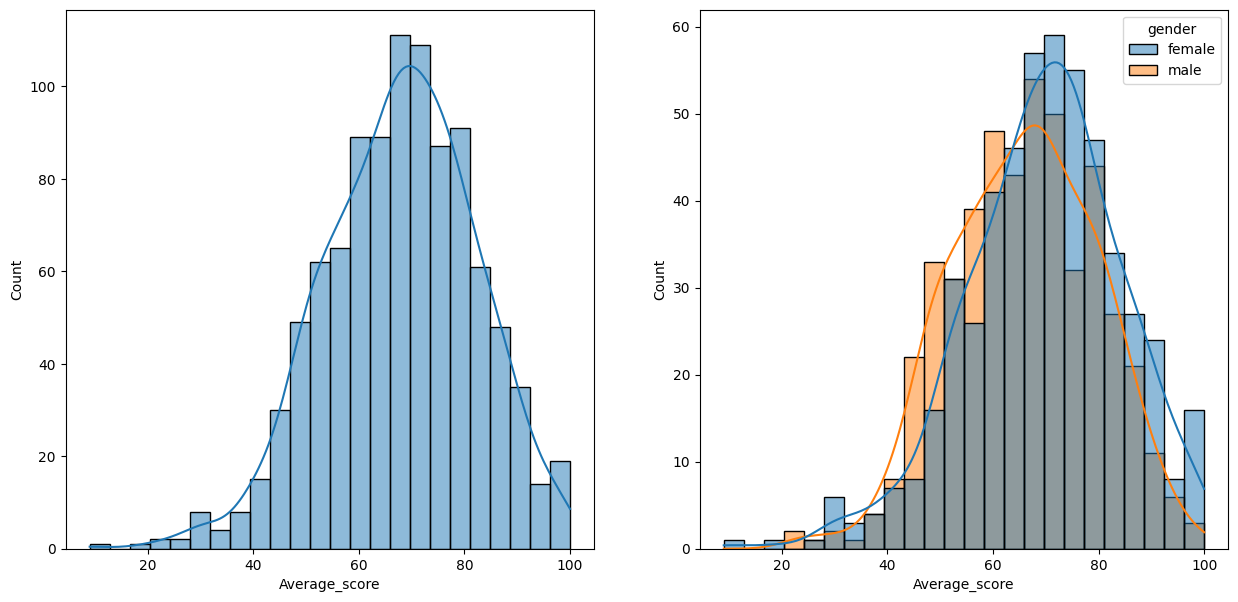

In [90]:
#histogram and kde
fig,axes=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='Average_score',kde=True)
plt.subplot(122)
sns.histplot(data=df,x='Average_score',kde=True,hue="gender")

In [91]:
df.rename(columns={'race/ethnicity': 'race_ethnicity',
                   'parental level of education':'parental_level_of_education',
                   "test preparation course":'test_preparation_course',
                   'math score':'math_score',
                   'reading score':'reading_score',
                    'writing score':'writing_score'}, inplace=True)
print(df)

     gender race_ethnicity parental_level_of_education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test_preparation_course  math_score  reading_score  writing_score  \
0                      none          72             72        

In [92]:
df.head(5)


,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,Average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [94]:
df.to_csv('C:\\Users\\admin\\Desktop\\MACHINE_LEARNING_CODES\\ML_PROJECT\\notebook\\data\\StudentsPerformance.csv   ', mode='a', header=True, index=False) 